

Source code from: “A Data Science Exercise: how similar is Trump to other Presidents based on Inaugural Speeches?” https://medium.com/@brianray_7981/a-data-science-exercise-how-similar-is-trump-to-other-presidents-based-on-inaugural-speeches-8fa7f534a5fb




### Getting the data

The data is stored in data.world

> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install git+git://github.com/datadotworld/data.world-py.git#egg=project[PANDAS]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [1]:
import datadotworld as dw
import pandas as pd
import numpy as np

In [2]:
# Load dataset (onto the local file system)
force_update = True
dataset_local = dw.load_dataset('brianray/c-span-inaugural-address',
                                force_update=force_update)  # cached under ~/.dw/cache

In [3]:
# See what is in it
dataset_local.describe()

{'description': 'C-Span all US inaugural Presidential addresses from 1789-2017\n\nScript used to create found here: https://github.com/brianray/data.world-scripts/blob/master/load%20inaugural%20addresses.ipynb\n\nOriginal data from http://www.nltk.org/\n\nAdded Fillmore 1850, Obama 2013 and Trump 2017',
 'homepage': 'https://data.world/brianray/c-span-inaugural-address',
 'keywords': ['politics',
  'inaugural',
  'presidential',
  'text',
  'nltk',
  'corpus'],
 'license': 'Public Domain',
 'name': 'brianray_c-span-inaugural-address',
 'resources': [{'format': 'csv',
   'name': 'c_span_inagural_addresses',
   'path': 'data/c_span_inagural_addresses.csv'},
  {'format': 'csv',
   'name': 'uspresident_wikipedia_urls_thmbs_hs_brray_presidents',
   'path': 'data/uspresident_wikipedia_urls_thmbs_hs_brray_presidents.csv'},
  {'bytes': 6861,
   'format': 'csv',
   'mediatype': 'text/csv',
   'name': 'original/USPresident-Wikipedia-URLs-Thmbs-HS_brray - presidents.csv',
   'path': 'original/USP

In [4]:
dataset_local.dataframes

LazyLoadedDict({'c_span_inagural_addresses': LazyLoadedValue(<pandas.DataFrame>), 'original/USPresident-Wikipedia-URLs-Thmbs-HS_brray - presidents.csv': LazyLoadedValue(<pandas.DataFrame>), 'uspresident_wikipedia_urls_thmbs_hs_brray_presidents': LazyLoadedValue(<pandas.DataFrame>), 'original/c-span-inagural-addresses.csv': LazyLoadedValue(<pandas.DataFrame>)})

In [5]:
df_presidents = dataset_local.dataframes['uspresident_wikipedia_urls_thmbs_hs_brray_presidents']
df_inagural = dataset_local.dataframes['c_span_inagural_addresses']

In [6]:
df_inagural

,year,president,speach_content
0,1789,Washington,Fellow-Citizens of the Senate and of the House...
1,1793,Washington,"Fellow citizens, I am again called upon by the..."
2,1797,Adams,"When it was first perceived, in early times, t..."
3,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805,Jefferson,"Proceeding, fellow citizens, to that qualifica..."
5,1809,Madison,Unwilling to depart from examples of the most ...
6,1813,Madison,About to add the solemnity of an oath to the o...
7,1817,Monroe,I should be destitute of feeling if I was not ...
8,1821,Monroe,"Fellow citizens, I shall not attempt to descri..."
9,1825,Adams,In compliance with an usage coeval with the ex...


In [7]:
df_presidents

,presidency,president,wikipedia_entry,took_office,left_office,party,portrait,thumbnail,home_state
0,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-03,4/3/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia
1,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-04-03,4/3/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts
2,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-04-03,4/3/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia
3,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-04-03,4/3/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia
4,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,1817-04-03,4/3/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia
5,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-04-03,4/3/1829,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts
6,7,Andrew Jackson,http://en.wikipedia.org/wiki/Andrew_Jackson,1829-04-03,4/3/1837,Democratic,Andrew_jackson_head.gif,thmb_Andrew_jackson_head.gif,Tennessee
7,8,Martin Van Buren,http://en.wikipedia.org/wiki/Martin_Van_Buren,1837-04-03,4/3/1841,Democratic,MartinVanBuren.gif,thmb_MartinVanBuren.gif,New York
8,9,William Henry Harrison,http://en.wikipedia.org/wiki/William_Henry_Har...,1841-04-03,4/4/1841,Whig,WilliamHenryHarrison.gif,thmb_WilliamHenryHarrison.gif,Ohio
9,10,John Tyler,http://en.wikipedia.org/wiki/John_Tyler,1841-04-04,4/3/1845,Whig,JohnTyler.jpg,thmb_JohnTyler.jpg,Virginia


In [8]:
def parse_year(row):
    return np.int64(row['took_office'].year)

df_presidents['year'] = df_presidents.apply(parse_year, axis=1)
df_presidents

,presidency,president,wikipedia_entry,took_office,left_office,party,portrait,thumbnail,home_state,year
0,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-03,4/3/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,1789
1,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-04-03,4/3/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,1797
2,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-04-03,4/3/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,1801
3,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-04-03,4/3/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,1809
4,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,1817-04-03,4/3/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia,1817
5,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-04-03,4/3/1829,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,1825
6,7,Andrew Jackson,http://en.wikipedia.org/wiki/Andrew_Jackson,1829-04-03,4/3/1837,Democratic,Andrew_jackson_head.gif,thmb_Andrew_jackson_head.gif,Tennessee,1829
7,8,Martin Van Buren,http://en.wikipedia.org/wiki/Martin_Van_Buren,1837-04-03,4/3/1841,Democratic,MartinVanBuren.gif,thmb_MartinVanBuren.gif,New York,1837
8,9,William Henry Harrison,http://en.wikipedia.org/wiki/William_Henry_Har...,1841-04-03,4/4/1841,Whig,WilliamHenryHarrison.gif,thmb_WilliamHenryHarrison.gif,Ohio,1841
9,10,John Tyler,http://en.wikipedia.org/wiki/John_Tyler,1841-04-04,4/3/1845,Whig,JohnTyler.jpg,thmb_JohnTyler.jpg,Virginia,1841


In [9]:
df = pd.merge(df_inagural, df_presidents, how='right', on=['year'])

df

,year,president_x,speach_content,presidency,president_y,wikipedia_entry,took_office,left_office,party,portrait,thumbnail,home_state
0,1789,Washington,Fellow-Citizens of the Senate and of the House...,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-03,4/3/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia
1,1797,Adams,"When it was first perceived, in early times, t...",2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-04-03,4/3/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts
2,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-04-03,4/3/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia
3,1809,Madison,Unwilling to depart from examples of the most ...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-04-03,4/3/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia
4,1817,Monroe,I should be destitute of feeling if I was not ...,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,1817-04-03,4/3/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia
5,1825,Adams,In compliance with an usage coeval with the ex...,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-04-03,4/3/1829,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts
6,1829,Jackson,"Fellow citizens, about to undertake the arduou...",7,Andrew Jackson,http://en.wikipedia.org/wiki/Andrew_Jackson,1829-04-03,4/3/1837,Democratic,Andrew_jackson_head.gif,thmb_Andrew_jackson_head.gif,Tennessee
7,1837,VanBuren,Fellow citizens: The practice of all my predec...,8,Martin Van Buren,http://en.wikipedia.org/wiki/Martin_Van_Buren,1837-04-03,4/3/1841,Democratic,MartinVanBuren.gif,thmb_MartinVanBuren.gif,New York
8,1841,Harrison,Called from a retirement which I had supposed ...,9,William Henry Harrison,http://en.wikipedia.org/wiki/William_Henry_Har...,1841-04-03,4/4/1841,Whig,WilliamHenryHarrison.gif,thmb_WilliamHenryHarrison.gif,Ohio
9,1841,Harrison,Called from a retirement which I had supposed ...,10,John Tyler,http://en.wikipedia.org/wiki/John_Tyler,1841-04-04,4/3/1845,Whig,JohnTyler.jpg,thmb_JohnTyler.jpg,Virginia


In [10]:
# Three presidents didn't have inauguration addresses:
#   Because William Henry Harrison death
#   Because Garfield assination,
#   Because of Kennedy assisnation,
#     and Nixon impeachment, the following presidents did not have formal speachs:
print(df.shape[0])
df = df[~df['presidency'].isin([10, #  John Tyler
                                21, #  Chester A. Arthur
                                36, #  Lyndon B. Johnson
                                38  #  Gerald Ford
                               ])]
print(df.shape[0])

45
41


In [11]:
def get_code(row):
    party = row['party']
    if party.startswith("Republican"):
        return 'R'
    elif party.startswith("Democratic"):
        return 'D'
    elif party.startswith("Independent"):
        return 'I'
    elif party.startswith("Whig"):
        return 'W'
    else: 
        return 'O'

df['party_short'] = df.apply(get_code, axis=1) 

/Users/brray/anaconda2/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Clustring



In [12]:
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

stemmer = SnowballStemmer("english")

#  http://brandonrose.org/clustering
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

stop_words = text.ENGLISH_STOP_WORDS.union(["'s", "mr.", "let", "come"])
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, 
                                   max_features=100000,
                                   min_df=0.2,
                                   stop_words=stop_words,
                                   use_idf=True,
                                   tokenizer=tokenize_and_stem,
                                   ngram_range=(1,3))
synopses = list(df['speach_content'])
%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 3.02 s, sys: 29.4 ms, total: 3.04 s
Wall time: 3.06 s
(41, 914)


In [13]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) 
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [14]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 111436 items in vocab_frame


In [15]:
terms = tfidf_vectorizer.get_feature_names()

In [16]:
from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
df['cluster'] = clusters
df

CPU times: user 971 ms, sys: 13.7 ms, total: 985 ms
Wall time: 306 ms


/Users/brray/anaconda2/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,year,president_x,speach_content,presidency,president_y,wikipedia_entry,took_office,left_office,party,portrait,thumbnail,home_state,party_short,cluster
0,1789,Washington,Fellow-Citizens of the Senate and of the House...,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-03,4/3/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,I,2
1,1797,Adams,"When it was first perceived, in early times, t...",2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-04-03,4/3/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,O,2
2,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-04-03,4/3/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,D,6
3,1809,Madison,Unwilling to depart from examples of the most ...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-04-03,4/3/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,D,6
4,1817,Monroe,I should be destitute of feeling if I was not ...,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,1817-04-03,4/3/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia,D,6
5,1825,Adams,In compliance with an usage coeval with the ex...,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-04-03,4/3/1829,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,D,6
6,1829,Jackson,"Fellow citizens, about to undertake the arduou...",7,Andrew Jackson,http://en.wikipedia.org/wiki/Andrew_Jackson,1829-04-03,4/3/1837,Democratic,Andrew_jackson_head.gif,thmb_Andrew_jackson_head.gif,Tennessee,D,2
7,1837,VanBuren,Fellow citizens: The practice of all my predec...,8,Martin Van Buren,http://en.wikipedia.org/wiki/Martin_Van_Buren,1837-04-03,4/3/1841,Democratic,MartinVanBuren.gif,thmb_MartinVanBuren.gif,New York,D,2
8,1841,Harrison,Called from a retirement which I had supposed ...,9,William Henry Harrison,http://en.wikipedia.org/wiki/William_Henry_Har...,1841-04-03,4/4/1841,Whig,WilliamHenryHarrison.gif,thmb_WilliamHenryHarrison.gif,Ohio,W,2
10,1845,Polk,"Fellow citizens, without solicitation on my pa...",11,James K. Polk,http://en.wikipedia.org/wiki/James_K._Polk,1845-04-03,4/3/1849,Democratic,JamesKPolk.gif,thmb_JamesKPolk.gif,Tennessee,D,6


In [17]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

cluster_words = {}
for i in range(num_clusters):
    cluster_words[i] = []
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        cluster_words[i].append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
cluster_words_df = pd.DataFrame.from_dict(cluster_words, orient="index")
cluster_words_df

Top terms per cluster:



/Users/brray/anaconda2/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,pay,dealings,debts,desire,ultimately,question,best,collect,determine,greatest,ability,public,paid,agitation,necessary,pride,religious,suffrage,methods,executing
1,congress,executing,business,policy,united,protected,need,revenue,demand,legislation,condition,trade,support,enforce,patriotism,obligations,labor,money,methods,enterprises
2,union,congress,executing,present,objects,foreign,subject,important,regard,instituted,principles,respect,party,united,exists,question,necessary,general,form,author
3,things,very,justice,women,men,eye,look,use,set,cost,industry,vision,party,live,counsels,means,waste,children,efficiency,thought
4,know,freedom,america,strength,man,together,help,today,need,words,god,presides,weakness,beginning,earth,live,day,history,friends,human
5,learn,today,way,perfect,achieved,democracy,strive,gained,simple,said,courage,honorable,truth,presence,remembering,understand,friends,feared,fellow,given
6,union,principles,happiness,foreign,opinions,preservation,protected,united,improve,best,extended,author,general,revenue,form,federal,favor,difficulty,republican,commerce
7,god,union,ceased,addressed,came,answer,judged,years,said,ago,extended,occasion,conflict,cause,need,party,seeking,continuance,toiling,anxious
8,america,today,ideal,challenge,generation,children,courage,celebrated,change,because,live,god,know,promises,thanks,freedom,small,millions,men,women
9,america,ideal,justice,progress,human,enforce,opportunities,responsibility,economical,contributed,republics,promoted,old,advanced,expresses,representatives,party,independent,business,order


In [18]:
cluster_words_df.to_excel("cluster_words.xls")

In [19]:
#!open cluster_words.xls

In [20]:
df

,year,president_x,speach_content,presidency,president_y,wikipedia_entry,took_office,left_office,party,portrait,thumbnail,home_state,party_short,cluster
0,1789,Washington,Fellow-Citizens of the Senate and of the House...,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-03,4/3/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,I,2
1,1797,Adams,"When it was first perceived, in early times, t...",2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-04-03,4/3/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,O,2
2,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-04-03,4/3/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,D,6
3,1809,Madison,Unwilling to depart from examples of the most ...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-04-03,4/3/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,D,6
4,1817,Monroe,I should be destitute of feeling if I was not ...,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,1817-04-03,4/3/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia,D,6
5,1825,Adams,In compliance with an usage coeval with the ex...,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-04-03,4/3/1829,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,D,6
6,1829,Jackson,"Fellow citizens, about to undertake the arduou...",7,Andrew Jackson,http://en.wikipedia.org/wiki/Andrew_Jackson,1829-04-03,4/3/1837,Democratic,Andrew_jackson_head.gif,thmb_Andrew_jackson_head.gif,Tennessee,D,2
7,1837,VanBuren,Fellow citizens: The practice of all my predec...,8,Martin Van Buren,http://en.wikipedia.org/wiki/Martin_Van_Buren,1837-04-03,4/3/1841,Democratic,MartinVanBuren.gif,thmb_MartinVanBuren.gif,New York,D,2
8,1841,Harrison,Called from a retirement which I had supposed ...,9,William Henry Harrison,http://en.wikipedia.org/wiki/William_Henry_Har...,1841-04-03,4/4/1841,Whig,WilliamHenryHarrison.gif,thmb_WilliamHenryHarrison.gif,Ohio,W,2
10,1845,Polk,"Fellow citizens, without solicitation on my pa...",11,James K. Polk,http://en.wikipedia.org/wiki/James_K._Polk,1845-04-03,4/3/1849,Democratic,JamesKPolk.gif,thmb_JamesKPolk.gif,Tennessee,D,6


In [21]:
# https://medium.com/@mishra.thedeepak/doc2vec-in-a-simple-way-fa80bfe81104

In [22]:
#Import all the dependencies
import gensim
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join

In [23]:
docLabels = ["{year}_{president_x}_{party_short}_{cluster}".format(**x) for x in df[['year',
                                                                                     'president_x',
                                                                                     'party_short',
                                                                                     'cluster']].to_dict(orient="records")]
data = list(df['speach_content'])

In [24]:
docLabels

['1789_Washington_I_2',
 '1797_Adams_O_2',
 '1801_Jefferson_D_6',
 '1809_Madison_D_6',
 '1817_Monroe_D_6',
 '1825_Adams_D_6',
 '1829_Jackson_D_2',
 '1837_VanBuren_D_2',
 '1841_Harrison_W_2',
 '1845_Polk_D_6',
 '1849_Taylor_W_2',
 '1850_Fillmore_W_2',
 '1853_Pierce_D_2',
 '1857_Buchanan_D_2',
 '1861_Lincoln_R_2',
 '1865_Lincoln_D_7',
 '1869_Grant_R_0',
 '1877_Hayes_R_2',
 '1881_Garfield_R_1',
 '1885_Cleveland_D_1',
 '1889_Harrison_R_1',
 '1893_Cleveland_D_1',
 '1897_McKinley_R_1',
 '1901_McKinley_R_1',
 '1909_Taft_R_1',
 '1913_Wilson_D_3',
 '1921_Harding_R_9',
 '1923_Coolidge_R_9',
 '1929_Hoover_R_9',
 '1933_Roosevelt_D_1',
 '1945_Roosevelt_D_5',
 '1953_Eisenhower_R_4',
 '1961_Kennedy_D_4',
 '1969_Nixon_R_4',
 '1977_Carter_D_4',
 '1981_Reagan_R_4',
 '1989_Bush_R_4',
 '1993_Clinton_D_8',
 '2001_Bush_R_8',
 '2009_Obama_D_8',
 '2017_Trump_R_8']

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
stopword_set = set(stopwords.words('english'))
#This function does all cleaning of data using two objects above
def nlp_clean(data):
    new_data = []
    for d in data:
        new_str = d.lower()
        dlist = tokenizer.tokenize(new_str)
        dlist = list(set(dlist).difference(stopword_set))
        new_data.append(dlist)
    return new_data

In [26]:
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.LabeledSentence(doc,    
[self.labels_list[idx]])

In [27]:
data = nlp_clean(data)

In [28]:
it = LabeledLineSentence(data, docLabels)

In [29]:
model = gensim.models.Doc2Vec(size=300, min_count=0, alpha=0.025, min_alpha=0.025)
model.build_vocab(it)
#training of model
for epoch in range(100):
    print('iteration {}'.format(epoch+1))
    model.train(it)
    model.alpha -= 0.002
    model.min_alpha = model.alpha
    model.train(it)
#saving the created model
#model.save(‘doc2vec.model’)
# print("model saved")

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [31]:

d2v_model = model
d2v_model.docvecs.similarity('2017_Trump_R_8', '2009_Obama_D_8')

0.96455819010553745

In [32]:
import numpy as np 
from pandas import DataFrame
%matplotlib


dfh = DataFrame(index=docLabels, columns=docLabels)

for x in docLabels:
    for y in docLabels:
        val = np.float64(d2v_model.docvecs.similarity(x, y))
        dfh.set_value(x, y, val*1000)
dfh = dfh[dfh.columns].astype(float)  # or int
dfh

Using matplotlib backend: MacOSX


,1789_Washington_I_2,1797_Adams_O_2,1801_Jefferson_D_6,1809_Madison_D_6,1817_Monroe_D_6,1825_Adams_D_6,1829_Jackson_D_2,1837_VanBuren_D_2,1841_Harrison_W_2,1845_Polk_D_6,...,1953_Eisenhower_R_4,1961_Kennedy_D_4,1969_Nixon_R_4,1977_Carter_D_4,1981_Reagan_R_4,1989_Bush_R_4,1993_Clinton_D_8,2001_Bush_R_8,2009_Obama_D_8,2017_Trump_R_8
1789_Washington_I_2,1000.000000,967.583359,964.268992,976.471014,956.681388,957.640527,968.882047,931.383035,933.801341,923.902325,...,930.821841,941.527752,922.951883,929.674498,929.224580,927.501600,923.570918,931.013394,922.305971,931.416820
1797_Adams_O_2,967.583359,1000.000000,955.112259,973.928498,955.122167,963.411990,972.290413,935.028694,915.322653,921.367016,...,912.756170,927.382664,915.529691,926.219417,912.249713,922.176574,914.386691,920.997467,911.544184,919.823019
1801_Jefferson_D_6,964.268992,955.112259,1000.000000,970.671655,946.264103,950.897677,964.247579,925.874019,907.899783,922.224276,...,921.274894,958.349007,930.756360,940.035930,936.563209,937.927127,935.020907,942.159138,937.660690,939.962569
1809_Madison_D_6,976.471014,973.928498,970.671655,1000.000000,964.450502,959.515326,974.042461,944.722921,926.132323,941.135145,...,914.936971,932.106678,913.033873,918.336485,924.517313,921.367331,916.673530,930.078270,916.070943,930.171945
1817_Monroe_D_6,956.681388,955.122167,946.264103,964.450502,1000.000000,945.224785,964.086251,923.771798,901.042779,915.372560,...,891.553765,908.477919,895.329309,900.776548,898.948318,905.094515,890.108171,903.128238,898.098218,900.402282
1825_Adams_D_6,957.640527,963.411990,950.897677,959.515326,945.224785,1000.000000,960.486662,919.447476,898.892430,929.100237,...,888.066519,914.761163,898.661451,908.612955,905.250457,906.673423,900.166891,906.667617,904.051742,901.744988
1829_Jackson_D_2,968.882047,972.290413,964.247579,974.042461,964.086251,960.486662,1000.000000,926.917246,908.425026,936.495915,...,902.141800,920.681654,896.150043,910.421662,901.479172,908.028611,895.988180,903.901574,907.711035,902.822675
1837_VanBuren_D_2,931.383035,935.028694,925.874019,944.722921,923.771798,919.447476,926.917246,1000.000000,894.797626,909.396879,...,869.638556,890.277651,874.715117,881.264935,877.981327,878.998023,872.026530,885.246472,881.035783,885.014533
1841_Harrison_W_2,933.801341,915.322653,907.899783,926.132323,901.042779,898.892430,908.425026,894.797626,1000.000000,878.456641,...,872.115260,890.360213,870.804157,875.935880,889.445698,886.186458,879.444432,883.582226,883.963606,883.989068
1845_Polk_D_6,923.902325,921.367016,922.224276,941.135145,915.372560,929.100237,936.495915,909.396879,878.456641,1000.000000,...,865.465619,883.783413,869.500249,870.897102,878.703244,874.474029,866.485602,873.299700,870.314351,882.775563


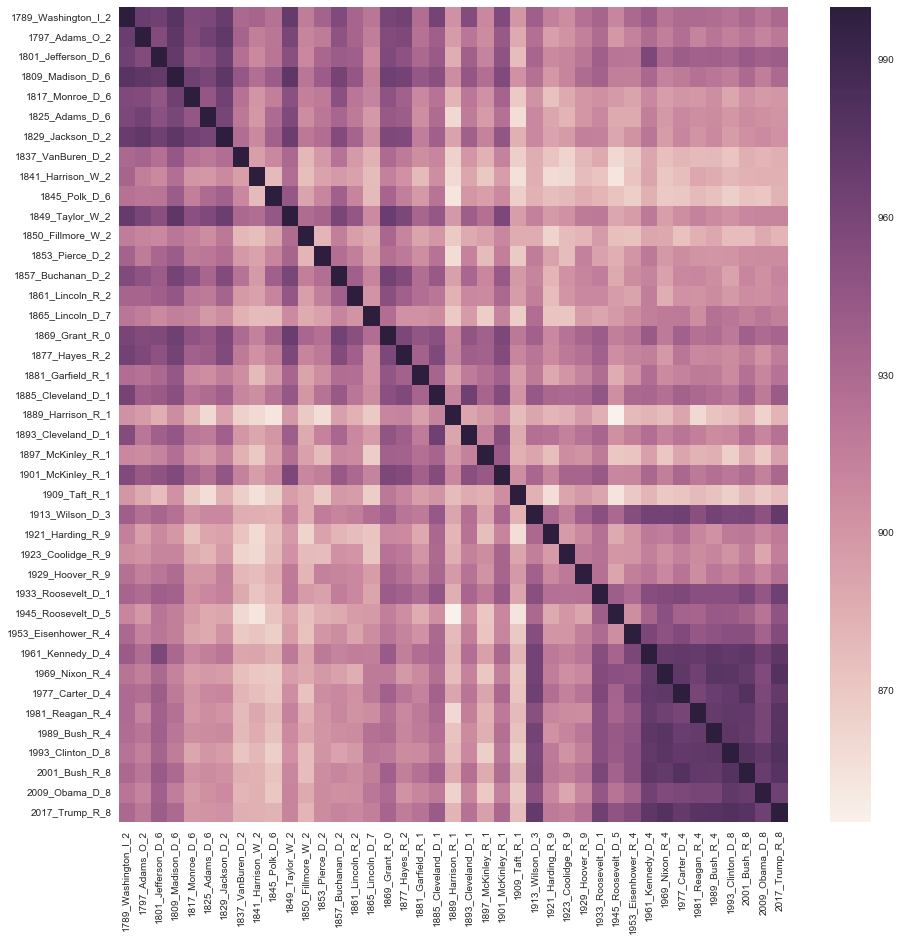

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 15))

ax = sns.heatmap(dfh)
ax

In [34]:
ax.get_figure().savefig("heatmap.png")

In [35]:
!open heatmap.png

In [37]:
d2v_model.docvecs.most_similar(['2017_Trump_R_8',], topn=10)

[('1993_Clinton_D_8', 0.9803394675254822),
 ('1969_Nixon_R_4', 0.9793786406517029),
 ('1989_Bush_R_4', 0.9780699014663696),
 ('2001_Bush_R_8', 0.977622926235199),
 ('1981_Reagan_R_4', 0.976525068283081),
 ('1961_Kennedy_D_4', 0.9741336107254028),
 ('1977_Carter_D_4', 0.9715098142623901),
 ('1913_Wilson_D_3', 0.9705339670181274),
 ('2009_Obama_D_8', 0.9645581841468811),
 ('1933_Roosevelt_D_1', 0.9645087718963623)]

In [ ]:
d2v_model.docvecs[0]

In [38]:
d2v_model.docvecs.similarity('2017_Trump_R_8', '1845_Polk_D_6')

0.88277556314094163

In [40]:
d2v_model.docvecs.similarity('2017_Trump_R_8', '1981_Reagan_R_4')

0.97652500383133867